In [1]:
from azure.quantum.qiskit import AzureQuantumProvider
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram

provider = AzureQuantumProvider (
    resource_id = "/subscriptions/b0c3bbe3-7123-4ba4-9aa2-57d9845f4a1d/resourceGroups/AzureQuantum/providers/Microsoft.Quantum/Workspaces/qchack-2022-b",
    location = "westus"
)

print("This workspace's targets:")
for backend in provider.backends():
    print("- " + backend.name())

This workspace's targets:
Opening in existing browser session.


libva error: vaGetDriverNameByIndex() failed with unknown libva error, driver_name = (null)
[166835:166835:0100/000000.442341:ERROR:sandbox_linux.cc(377)] InitializeSandbox() called with multiple threads in process gpu-process.


- ionq.qpu
- ionq.simulator
- quantinuum.hqs-lt-s1
- quantinuum.hqs-lt-s1-apival
- quantinuum.hqs-lt-s2
- quantinuum.hqs-lt-s2-apival
- quantinuum.hqs-lt-s1-sim
- quantinuum.hqs-lt-s2-sim


In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from multi_adder import MultiAdder

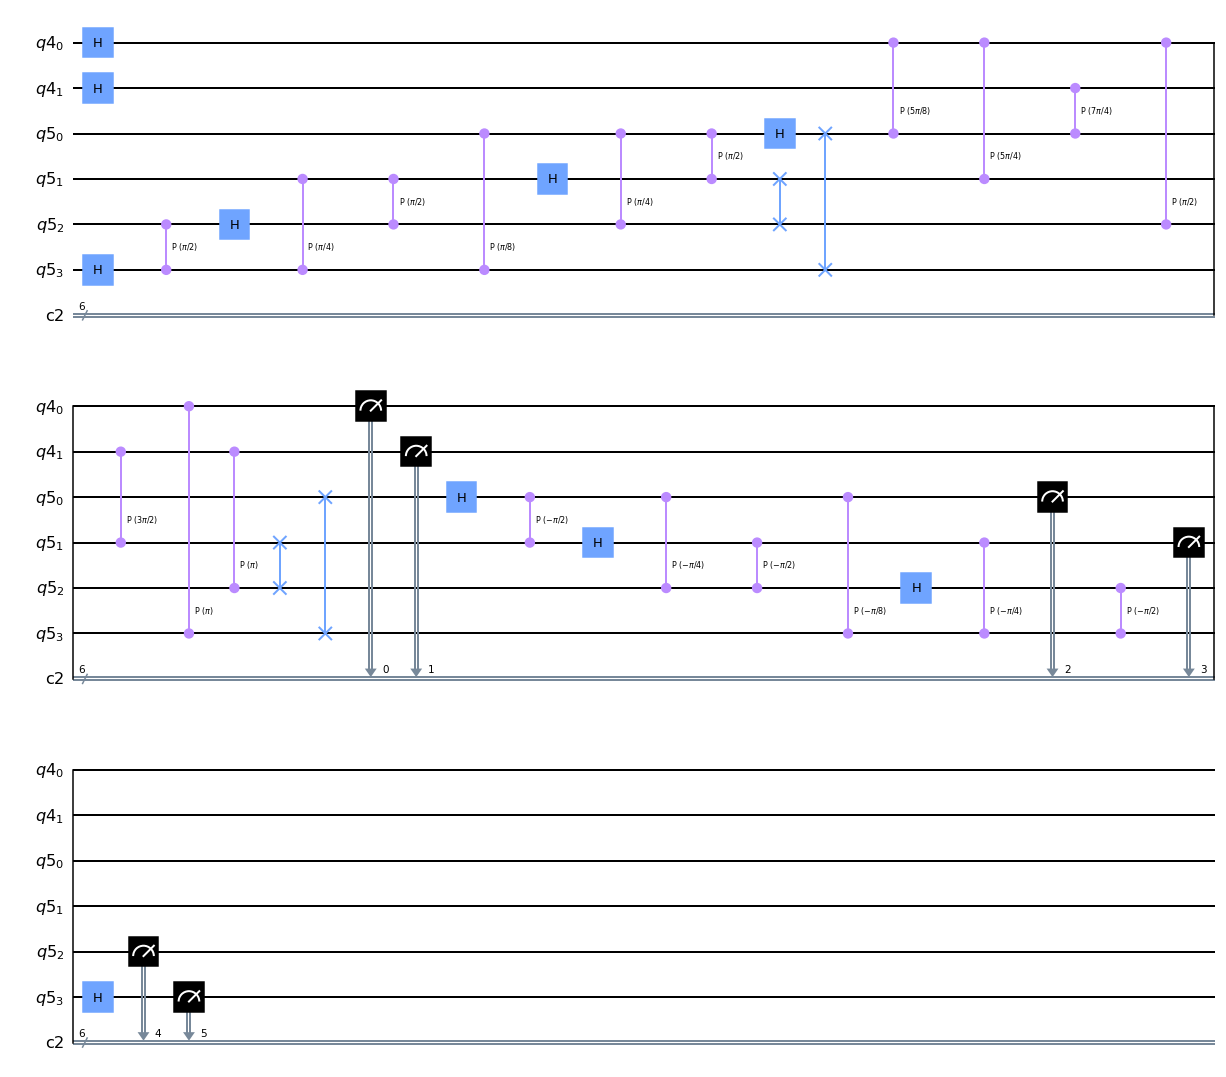

In [5]:
I = QuantumRegister(2)
V = QuantumRegister(4)
R = ClassicalRegister(6)

circ = QuantumCircuit(I, V, R)

multi_adder = MultiAdder([int("0101", 2), int("1110",2)], I, V)

circ.h(I[0])
circ.h(I[1])
circ.compose(multi_adder, [*I, *V], inplace=True)
circ.measure([*I, *V], R)

circ.draw("mpl")

In [6]:
ionq_simulator_backend = provider.get_backend("ionq.simulator")

In [7]:
job = ionq_simulator_backend.run(circ, shots=100)
print("Job id:", job.id())

Job id: 1477764c-b856-11ec-b27c-9843fa02ff35


In [9]:
job_monitor(job)

Job Status: job has successfully run


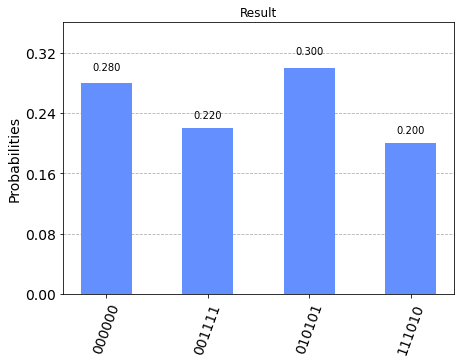

In [12]:
result = job.result()
plot_histogram(result.get_counts(circ), title="Result")